## 15.1 Introduction to Count Data and Poisson Distribution:

### 15.1.1 Introduction to Count Data

Quantitative data can be divided generally into two sub groups: continuous and discrete. Discrete data typically involves integers which cannot be made with greater precision, for example, the number of operations a patient has undergone cannot have divisible entities i.e. 2.8 operations makes no sense. However, continuous data can have non integers which can be increased in precision for example a volume of liquid could be recorded in litres, mililitres, millimillilitre and so on. 

Count data is a discrete data type which can only take non-negative integer values, for example {0, 1, 2, 3, ...}. These integers should arise from counting and not ranking. Count data is common in health data, for example the number of readmissions to hospital a person has would be classed as count data.

When count data is treated as a random variable where possible values represent the possible outcomes of say a future experiment, then count data can be modelled by the Poisson, binomial and negative binomial distributions. This section only focuses on using the Poisson distribution, however briefly to cover how the other two distribution can be used if we think of clinical trials as a dichotomised variable defined as success or fail then:

•	Binomial distribution can be used to describe the count of successful trials achieved in a total number of trials, given a constant probability of success.

•	Negative binomial distribution can be used to describe the count of successful trials until observing a defined number of failures, given a constant probability of success.

### 15.1.2 Why can't we just use Ordinary Linear Regression?

One of the main assumptions required for fitting an ordinary linear regression (OLR) is that the residual errors must follow a normal distribution. For this to be achieved with data from a skewed distribution, a transformation must be applied however with discrete data this can be very problematic (making the interpretation of the findings unfeasibly difficult) or impossible (for example, a high number of 0’s could prevent normality from being achieved). Another issue is that an OLR has the ability to create negative predicted values which would be theoretically impossible. For these reasons it is better to apply a method which actually reflects the natural distribution instead of trying to make the distribution reflect the method. This is why a Poisson regression is generally more suited to count data than OLR.

### 15.1.3 Poisson Distribution Recap
#### 15.1.3.1 What is the Poisson Distribution

The Poisson distribution was first published by Siméon Denis Poisson in 1838. Poisson was a French mathematician, engineer, and physicist, his name is one of 72 engraved on the Eiffel Tower in Paris. The Poisson distribution is a skewed, discrete distribution restricted to non-negative numbers. The shape of the distribution is defined by the shape parameter $\lambda$ which represents the average number of events in the given time interval. As $\lambda$ increases the distribution looks more and more like the normal distribution. When $\lambda$ is about 10 or greater, then a normal distribution is a good approximation. 

Please play with changing lambda ($\lambda$) in the example below to discover its effects on the shape of the distribution:


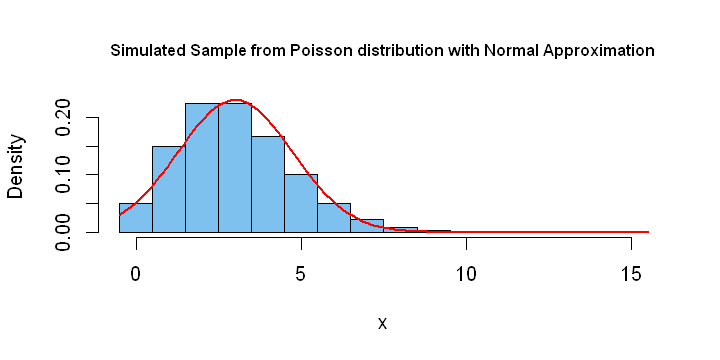

In [1]:
options(repr.plot.width=6, repr.plot.height=3)
options(warn=-1)

#Number of data points
n<-10^6
#Lambda is the shape parameter which indicates the average number of events in the given time interval.
#Please try different values.
lambda<- 3

#Simulate Sample
y = rpois(n, lambda);  up=max(y)

#Plot histogram 
hist(y, prob=T, br=(-1:up)+.5, col="skyblue2", xlab="x", 
  main="Simulated Sample from Poisson distribution with Normal Approximation", cex.main=0.8)
curve(dnorm(x, mean(y), sd(y)), col="red", lwd=2, add=T)
#dnorm here is creating the PDF for a normal distribution to plot on the graph. 

#### 15.1.3.2 Rules for using the Poisson!

-	There should not be a limit for how any times an event can occur during a time period. 

  - For example, if there was a rule that a participant can only have two hospital appointments in a year, then the resulting counts for all participants would not be a Poisson distribution.
    
-	Events must occur independently. If an event occurs, then it should not affect the probability of another event occurring in the same period.

  - For example, if a participant has a hospital appointment in which they are told they must come back 5 more times in the year. 

-	The average rate of events occurring should be constant and not affected by time. 

  - For example, if the participants are not allowed to have hospital appointments in the first 11 months of a year.

-	The probability of an event occurring is proportional to the length of the time period being examined. 

  - For example, a participant should be twice as likely to have an appointment in 2 months compared to 1 month. 

- Two events cannot occur at exactly the same instant. 

  - For example, a participant cannot have two appointments at the same time. 

#### 15.1.3.3 Poisson Distribution Characteristics

General Characteristics:
- Mean: $\mu$ = $\lambda$
- Variance: $\lambda$
- Range: 0 to $\infty$
- Standard Deviation:  $\sqrt{ \lambda}$
- Coefficient of Variation:	$\frac{1}{\sqrt{ \lambda}}$

To determine the distribution of a discrete random variable we can either provide its Probability Mass Function (PMF) or Cumulative Density Function (CDF).

The formal definition of a **PMF** is it is a function over the sample space of a discrete random variable $X$ which gives the probability that $x$ is equal to a certain value. In count data terms it means it is a function of the count variable which can return the probability of any count value being observed, i.e. it can give the probability of say participants having 2 hospital appointments in a year. 


If $X$ (a discrete random variable) is assumed to have a Poisson distribution with parameter $\lambda>0$, for counts $x$ = 0,1,2,…, the PMF of $X$ is given by:

$$ f(x; \lambda) = P(X=x) = \frac{\lambda^{x}e^{-\lambda}}{x!}$$

Where $e$ is Euler’s number ($e=2.71$…) and $x!$ is a factorial (i.e. $3!=3x2x1$ and $5!= 5x4x3x2x1$).The positive real number $\lambda$ is equal to the expected value of $X$ and also the expected variance of $X$ (in a Poisson distribution the mean and variance are the same).

The previous graph represents a plot of the Poisson PMF, you can see that as you increase and decrease $\lambda$ the shape of the graph changes.

The formal definition of a **CDF** is it is a function over the sample space of a discrete random variable $X$ which gives the probability that $x$ is less than or equal to a certain value. In count data terms it means it is a function of the count variable which can return the probability of being less than or equal to a count value, i.e. it can give the probability of say participants having less than or equal to 3 hospital appointments in a year. 

$$ f(x; \lambda) = P(X\leq x) = \sum_{i=0}^{x} \frac{\lambda^{i}e^{-\lambda}}{i!}$$

The following graph shows the Poisson cumulative distribution function, please change $\lambda$ to explore the effects:


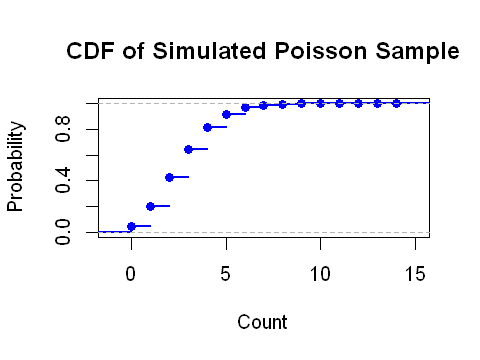

In [2]:
options(repr.plot.width=4, repr.plot.height=3)
#Number of data points
n<-10^6
#Lambda is the shape parameter which indicates the average number of events in the given time interval.
#Please try different values.
lambda<- 3

#Simulate Sample
y = rpois(n, lambda)

#Plot 
plot(ecdf(y), col = "blue", lwd = 2,
     main = "CDF of Simulated Poisson Sample", ylab="Probability", xlab="Count")